In [1]:
policies = []
policy = {}

policy['1']=[.55,.7]
policy['2']=[0,0]
policy['3']=[0,0]
policy['4']=[0,0]
policy['5']=[0,0]

policies.append(policy)
print(policies)

[{'1': [0.55, 0.7], '2': [0, 0], '3': [0, 0], '4': [0, 0], '5': [0, 0]}]


In [3]:
import numpy as np
import pandas as pd
from collections import OrderedDict

from netsapi.challenge import *
from sys import exit, exc_info, argv

/usr/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
print(policies[0]['1']) #Action in Year 1

env = ChallengeEnvironment() #Initialise Challenge Environment
reward = env.evaluateReward(np.asarray(policies[0]['1'])) #This has been negated and any reward should be maximised

print(reward)

[0.55, 0.7]
100  Evaluations Remaining
12.823093473278048


In [5]:
envSeqDec = ChallengeSeqDecEnvironment() #Initialise a New Challenge Environment to post entire policy
reward = envSeqDec.evaluatePolicy(policies[0]) #Action in Year 1 only

print(reward)

105  Evaluations Remaining
12.693308835264242


In [6]:
rewards = [reward]
for i in range(10):   
    reward = envSeqDec.evaluatePolicy(policies[0])
    rewards = np.append(rewards, reward)
    
print(rewards)

100  Evaluations Remaining
95  Evaluations Remaining
90  Evaluations Remaining
85  Evaluations Remaining
80  Evaluations Remaining
75  Evaluations Remaining
70  Evaluations Remaining
65  Evaluations Remaining
60  Evaluations Remaining
55  Evaluations Remaining
[12.69330884 11.83730415 13.16138403 11.57266799 11.544019   12.36210113
 11.85800522 11.9272818  13.13517541 12.89163672 13.11529782]


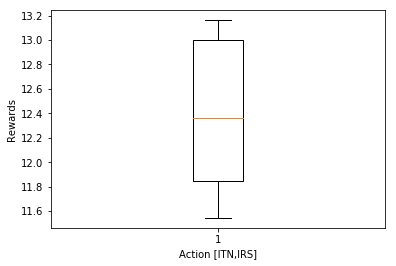

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.boxplot(rewards)
plt.xlabel('Action [ITN,IRS]')
plt.ylabel('Rewards')

plt.show()

In [8]:
episode_count = 1 

reward = 0
for i in range(episode_count):
    envSeqDec.reset()
    episodic_reward = 0

    while True:
        
        #Agent Training Code here
        action = [abs(np.sin(reward)),abs(np.cos(reward))] 
        envSeqDec.policy[str(envSeqDec.state)] = action 
        
        ob, reward, done, _ = envSeqDec.evaluateAction(action)
        print('reward',reward)
        episodic_reward += reward
        
        if done:
            break
    
    policies.append(envSeqDec.policy)
    print('policy', envSeqDec.policy)
    print('episodic_reward', episodic_reward)

50  Evaluations Remaining
reward 101.38600327894167
49  Evaluations Remaining
reward 54.71803602452188
48  Evaluations Remaining
reward -30.61680255308627
47  Evaluations Remaining
reward 24.09914310007649
46  Evaluations Remaining
reward -69.45163722551399
policy {'1': [0.0, 1.0], '2': [0.7545960907910104, 0.65618956084574], '3': [0.9664322770849566, 0.25692149347297855], '4': [0.7167454886732585, 0.6973348582040998], '5': [0.8591458201056329, 0.5117308470231392]}
episodic_reward 80.13474262493975


In [10]:
class CustomAgent:
    def __init__(self, environment):
        self.environment = environment

    def generate(self):
        best_policy = None
        best_reward = -float('Inf')
        candidates = []
        try:
            # Agents should make use of 20 episodes in each training run, if making sequential decisions
            for i in range(20):
                self.environment.reset()
                policy = {}
                for j in range(5): #episode length
                    policy[str(j+1)]=[random.random(),random.random()]
                candidates.append(policy)
                
            rewards = self.environment.evaluatePolicy(candidates)
            best_policy = candidates[np.argmax(rewards)]
            best_reward = rewards[np.argmax(rewards)]
        
        except (KeyboardInterrupt, SystemExit):
            print(exc_info())
            
        return best_policy, best_reward

In [11]:
EvaluateChallengeSubmission(ChallengeSeqDecEnvironment, CustomAgent, "tutorial.csv")

105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
105  Evaluations Remaining
174.1569334191546
